This file graphs the logDI values for each threshold.

In [1]:
import numpy as np
import pandas as pd
import math
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.metrics import roc_auc_score
import model_bias_analysis
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina' # feel free to comment this line out if not using retina screen
import csv

In [2]:
test_log_thresh = pd.read_csv("test_log.csv")
train_log_thresh = pd.read_csv("train_log.csv")

In [3]:
test_log_thresh.head()

,logDI,threshold
0,4.335278,5
1,4.470303,10
2,16.556301,15
3,16.800798,20
4,24.559161,25


In [4]:
train_log_thresh.head()

,logDI,threshold
0,3.627771,5
1,3.713701,10
2,11.015149,15
3,11.088596,20
4,14.825238,25


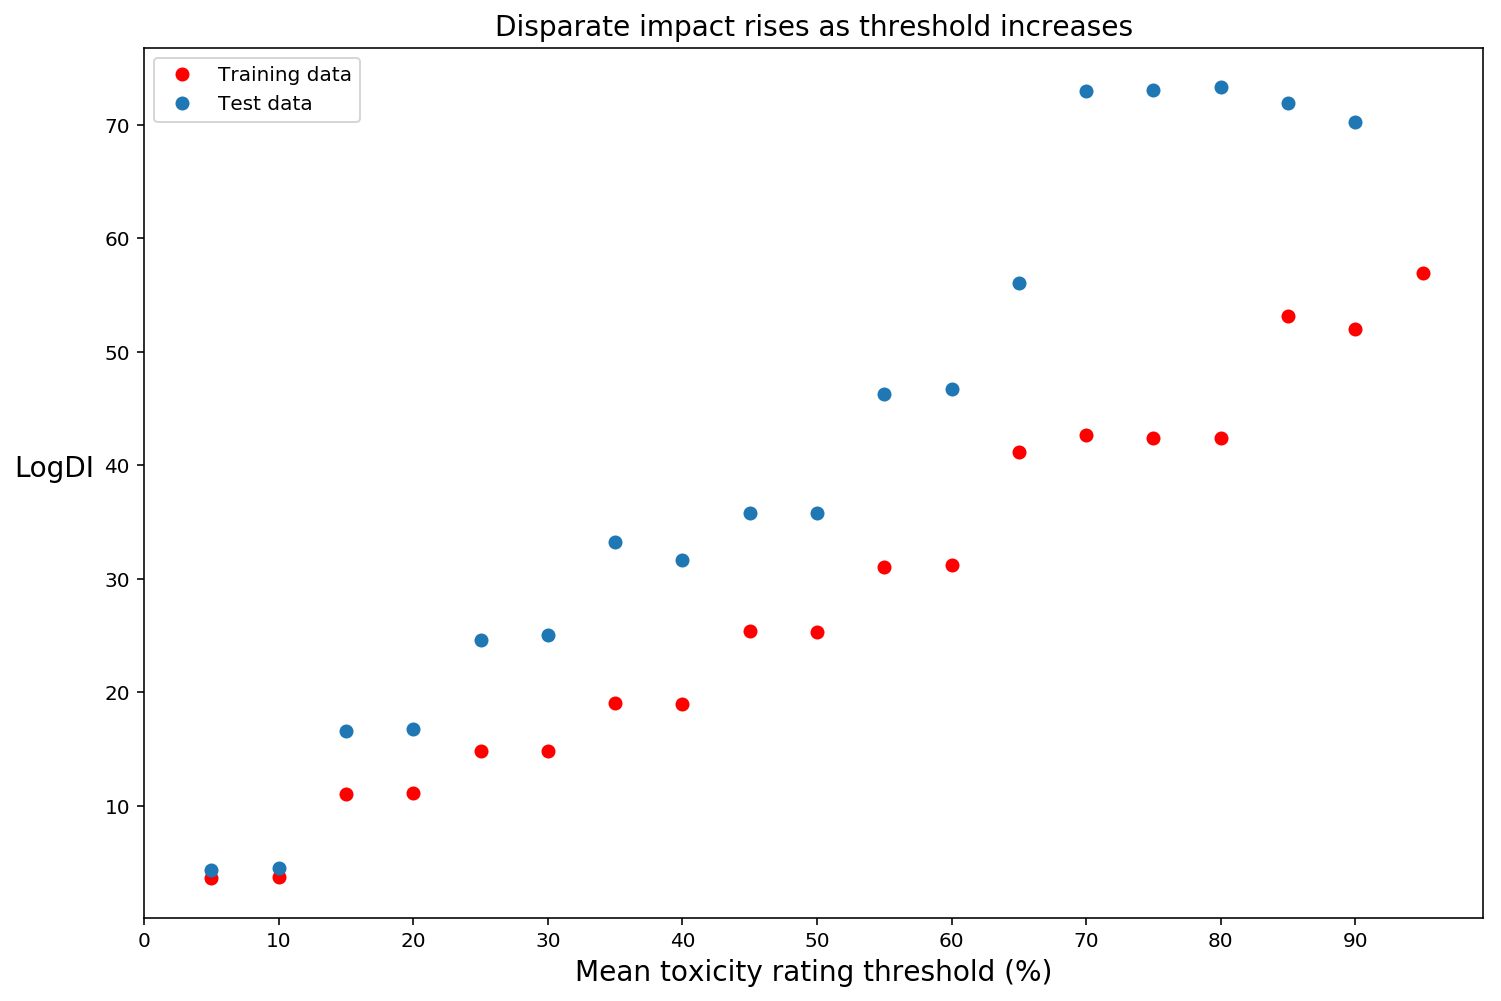

In [14]:
# Graphing the relationship between mean toxicity rating threshold and LogDI.
# Red dots indicate LogDI of the training data.
# Blue dots indicate LogDI of the test data.

plt.figure(figsize=(12, 8))

# test_log_thresh.plot(x='threshold', y='logDI')
plt.plot(train_log_thresh['threshold'], train_log_thresh['logDI'], "ro", label='Training data')
plt.plot(test_log_thresh['threshold'], test_log_thresh['logDI'], "o", label='Test data')
plt.legend()

# plt.xlim([0, 100])
# plt.ylim([-0.05, .3])
plt.title("Disparate impact rises as threshold increases", fontsize=14)
plt.xlabel("Mean toxicity rating threshold (%)", fontsize=14) # Threshold of aggregate human ratings for training data, or cautiousness in classifying as toxic")
plt.ylabel("LogDI", fontsize=14, rotation=0, labelpad=25)
plt.xticks(np.arange(0, 100, step=10))
plt.savefig('logDI_threshold.png', bbox_inches='tight')
# You could also try mapping the difference between test DI and training DI against the threshold.